In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import the data

In [36]:
# read the csv-file
data = pd.read_csv('titanic.csv')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create some new features

In [39]:
# Replace NaN values of the cabin
data.Cabin.fillna('U', inplace=True)

In [40]:
# Create "Deck" Feature from the first string of the cabin number
data['Deck'] = data['Cabin'].str[0]

In [41]:
# IsAlone if parch and Sibsp are 0
data['IsAlone'] = np.where(((data['SibSp'] == 0) & (data['Parch'] == 0)), True, False)
print(data[['PassengerId', 'SibSp', 'Parch', 'IsAlone']].head())

   PassengerId  SibSp  Parch  IsAlone
0            1      1      0    False
1            2      1      0    False
2            3      0      0     True
3            4      1      0    False
4            5      0      0     True


In [42]:
# Male and Female feature
data['Male'] = data['Sex'].map({'male': 1, 'female': 0}).astype(int)
data['Female'] = data['Sex'].map({'female': 1, 'male': 0}).astype(int)

### Drop the obsolete features

In [43]:
data.drop(['Sex', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

### Show the number of missing values for each variable

In [44]:
data.isnull().sum()[data.isnull().sum() > 0]

Age         177
Embarked      2
dtype: int64

# Simple Statistics and Plots
Absolute and relative frequencies

### Number of Persons surviving the disaster

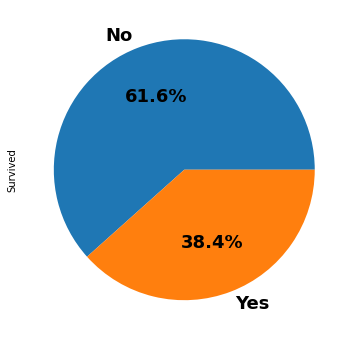

In [50]:
_ = plt.figure(figsize=(6, 6))

labels = 'No', 'Yes'
survived = data['Survived'].value_counts()
survived.plot.pie(labels=labels, autopct='%.1f%%', textprops={'fontsize': 18, 'weight': 'bold'});

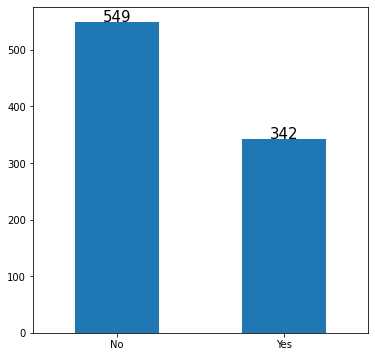

In [149]:
_ = plt.figure(figsize=(6, 6))

labels = 'No', 'Yes'
ax = data['Survived'].value_counts().plot.bar(rot=0)

# https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height()),
                (p.get_x() + p.get_width() / 2, p.get_height()+10),
                ha='center', va='center', size=15)
    
plt.xticks([0,1],['No', 'Yes']);

### Sex of the Passengers